In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


# **DATA LOADING AND DESCRIPTION**

**Importing necessary libraries**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

In [111]:
train = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

In [71]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [72]:
train.shape

(20000, 22)

In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [74]:
train.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

According to the data description, we can notice certain things here. 
1. The data is a mixture of both categorical and float features, categorical features being a majority.
2. Out of the 22 columns, **7 columns** have null values. 


# **DESCRIPTIVE STATISTICS and EXPLORATORY DATA ANALYSIS**

In [75]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


According to the Data description (train.describe()), minimum value for victim_age is -2.000000, which is not a meaningful value, therefore, it will be better to treat it as a null value. 


**Visualizing the distribution of categories across different groups**

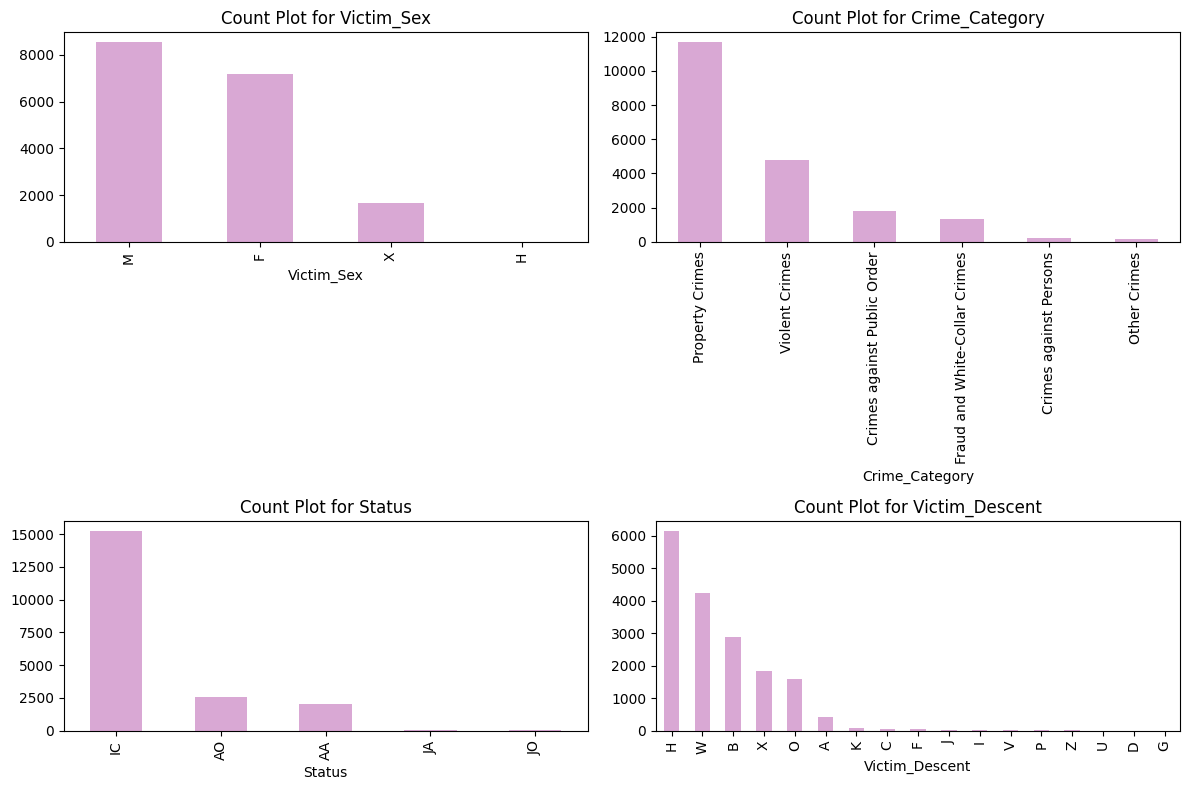

In [76]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

# Plot for Victim_Sex
train['Victim_Sex'].value_counts().plot(kind='bar', ax=axes[0, 0], color='#D9A8D4')
axes[0, 0].set_title('Count Plot for Victim_Sex')

# Plot for Crime_Category
train['Crime_Category'].value_counts().plot(kind='bar', ax=axes[0, 1], color='#D9A8D4')
axes[0, 1].set_title('Count Plot for Crime_Category')

# Plot for Status
train['Status'].value_counts().plot(kind='bar', ax=axes[1, 0], color='#D9A8D4')
axes[1, 0].set_title('Count Plot for Status')

# Plot for Victim_Descent
train['Victim_Descent'].value_counts().plot(kind='bar', ax=axes[1, 1], color='#D9A8D4')
axes[1, 1].set_title('Count Plot for Victim_Descent')

plt.tight_layout()
plt.show()

/tmp/ipykernel_34/2972941978.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/tmp/ipykernel_34/2972941978.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



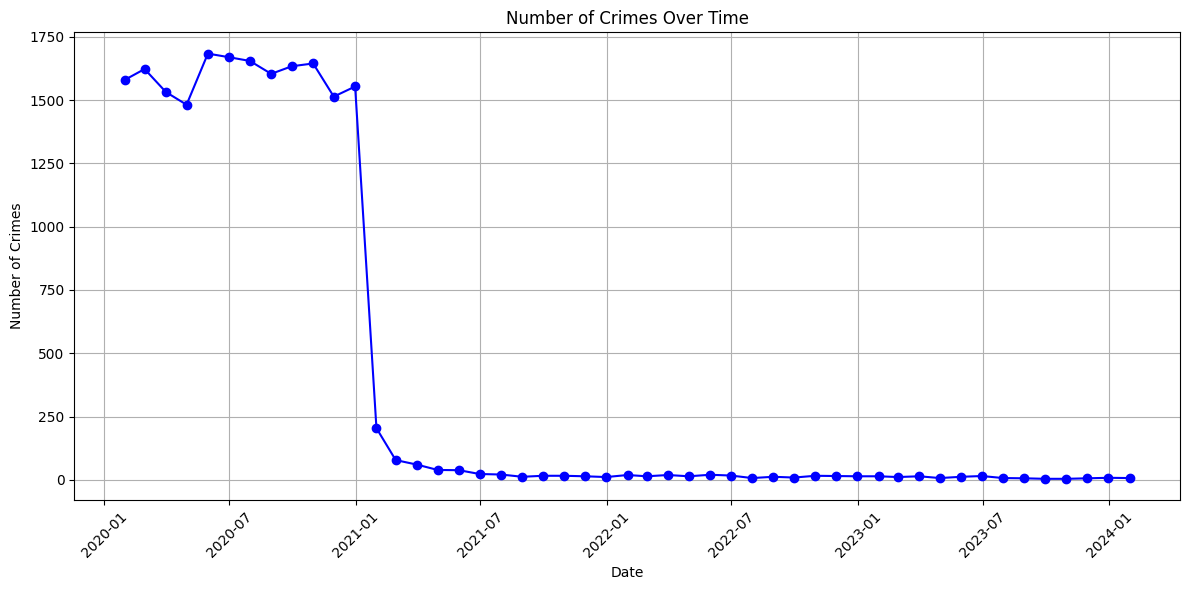

In [80]:
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])

# Group by month and count the number of crimes
monthly_crimes = train.groupby(pd.Grouper(key='Date_Reported', freq='M')).size()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_crimes.index, monthly_crimes.values, marker='o', linestyle='-', color='b')
plt.title('Number of Crimes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

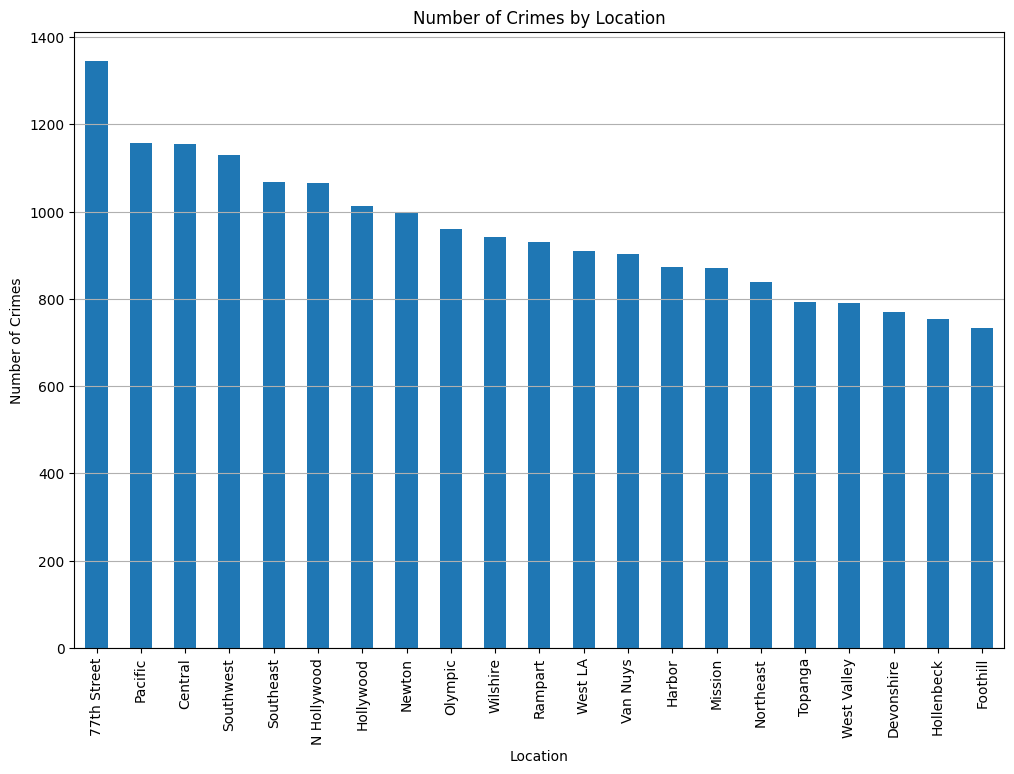

In [81]:
location_counts = train['Area_Name'].value_counts()

plt.figure(figsize=(12, 8))
location_counts.plot(kind='bar')
plt.title('Number of Crimes by Location')
plt.xlabel('Location')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

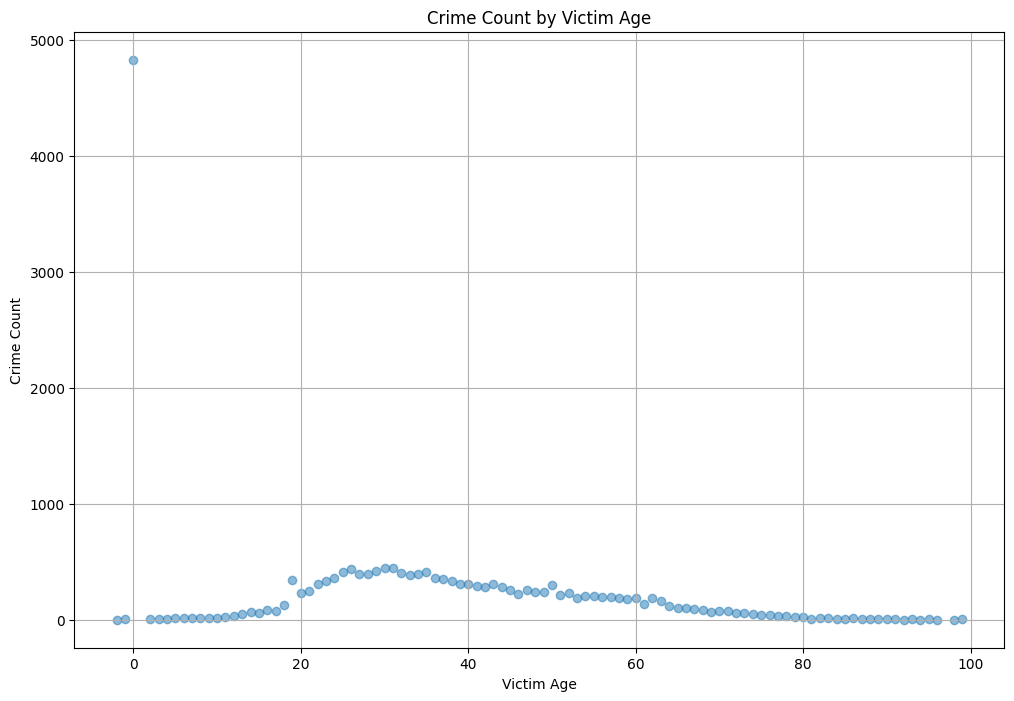

In [82]:
age_crime_counts = train.groupby('Victim_Age')['Crime_Category'].count().reset_index()
age_crime_counts.columns = ['Victim_Age', 'Crime_Count']

# Plot scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(age_crime_counts['Victim_Age'], age_crime_counts['Crime_Count'], alpha=0.5)
plt.title('Crime Count by Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Crime Count')
plt.grid(True)
plt.show()

In [104]:
train[train['Victim_Age'] <= 0]['Victim_Age'].value_counts()

Victim_Age
 0.0    4828
-1.0       4
-2.0       2
Name: count, dtype: int64

replacing invalid age values (0, -1, -2) in the Victim_Age column with NaN to treat them as missing data for further imputation. 

In [106]:
train['Victim_Age'] = train['Victim_Age'].replace([0, -1, -2], np.nan)

---------------
We will now run **Chi-Square Test of Independence** which assesses whether there is a significant association between two categorical variables. A low p-value (typically < 0.05) suggests that there is a significant association between the variables.

In [45]:
#Area_ID & Area_Name
contingency_table = pd.crosstab(train['Area_ID'], train['Area_Name'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 400000.0
P-Value: 0.0


In [39]:
#Premise_Code & Premise_Description
contingency_table = pd.crosstab(train['Premise_Code'], train['Premise_Description'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 4298925.0
P-Value: 0.0


In [46]:
#Weapon_Used_Code & Weapon_Description
contingency_table = pd.crosstab(train['Weapon_Used_Code'], train['Weapon_Description'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 410759.99999999994
P-Value: 0.0


In [47]:
#Status & Status_Description
contingency_table = pd.crosstab(train['Status'], train['Status_Description'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

Chi-Square Statistic: 80000.0
P-Value: 0.0


The Chi-Square test results indicate a strong association between the categorical variables, suggesting that removing one of them could help avoid redundancy and simplify the analysis.

# **FEATURE ENGINEERING**

1. Dropping Redundant Columns
2. Handling Date Features
3. Handling Null Values
4. Feature Scaling
5. Handling Text Data

In [112]:
train = train.drop(['Area_Name','Premise_Description','Weapon_Description','Status_Description'],axis=1)

Extracting useful components from date features to capture temporal information

In [114]:
date_format = '%d-%m-%Y'

train['Date_Reported'] = pd.to_datetime(train['Date_Reported'], format=date_format, errors='coerce')
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'], format=date_format, errors='coerce')

train['Year_Reported'] = train['Date_Reported'].dt.year
train['Month_Reported'] = train['Date_Reported'].dt.month
train['Day_Reported'] = train['Date_Reported'].dt.day
train['Weekday_Reported'] = train['Date_Reported'].dt.weekday

train['Year_Occurred'] = train['Date_Occurred'].dt.year
train['Month_Occurred'] = train['Date_Occurred'].dt.month
train['Day_Occurred'] = train['Date_Occurred'].dt.day
train['Weekday_Occurred'] = train['Date_Occurred'].dt.weekday

train['Time_Diff'] = (train['Date_Reported'] - train['Date_Occurred']).dt.days

In [117]:
train = train.drop(['Date_Reported','Date_Occurred'],axis=1)

I separated the features from the target variable by dropping 'Crime_Category' from the dataset to create the feature set X_train, and assigned 'Crime_Category' to y_train as the target variable.

In [119]:
X_train = train.drop(['Crime_Category'], axis = 1)
y_train = train['Crime_Category']

In [121]:
from sklearn.preprocessing import LabelEncoder

In [123]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([4, 4, 4, ..., 4, 1, 4])

In [124]:
X_train.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Time_Occurred',
       'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi',
       'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code',
       'Weapon_Used_Code', 'Status', 'Year_Reported', 'Month_Reported',
       'Day_Reported', 'Weekday_Reported', 'Year_Occurred', 'Month_Occurred',
       'Day_Occurred', 'Weekday_Occurred', 'Time_Diff'],
      dtype='object')

In [125]:
cat_cols = ['Cross_Street', 'Latitude', 'Longitude',
       'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi','Victim_Sex', 'Victim_Descent', 'Premise_Code',
       'Weapon_Used_Code', 'Status']
num_cols = ['Year_Reported', 'Month_Reported','Day_Reported', 'Weekday_Reported', 'Year_Occurred', 'Month_Occurred',
       'Day_Occurred', 'Weekday_Occurred', 'Time_Diff','Victim_Age','Time_Occurred']
text = ['Location']

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer

In [128]:
cat_pipe = Pipeline([('imputer',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder(handle_unknown='ignore'))])
num_pipe = Pipeline([('imputer',SimpleImputer(strategy='mean')),('ss',StandardScaler())])
text_pipe = Pipeline([('vectorizer',TfidfVectorizer())])

transform1 = ColumnTransformer(transformers=[
    ('cat',cat_pipe,cat_cols),
    ('num',num_pipe,num_cols)
])
transform2 = ColumnTransformer([('text_pipe',text_pipe,'Location')])

union = FeatureUnion([('transform1',transform1),('transform2',transform2)])
union

FeatureUnion(transformer_list=[('transform1',
                                ColumnTransformer(transformers=[('cat',
                                                                 Pipeline(steps=[('imputer',
                                                                                  SimpleImputer(strategy='most_frequent')),
                                                                                 ('ohe',
                                                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                                                 ['Cross_Street',
                                                                  'Latitude',
                                                                  'Longitude',
                                                                  'Area_ID',
                                                                  'Reporting_District_no',
                                                                  'Part 1-2',
                                                                  'Modus_Operandi',
                                                                  'Victim_Sex',
                                                                  'Victim_Descent',
                                                                  'Premise_Code',
                                                                  'Wea...
                                                                                  SimpleImputer()),
                                                                                 ('ss',
                                                                                  StandardScaler())]),
                                                                 ['Year_Reported',
                                                                  'Month_Reported',
                                                                  'Day_Reported',
                                                                  'Weekday_Reported',
                                                                  'Year_Occurred',
                                                                  'Month_Occurred',
                                                                  'Day_Occurred',
                                                                  'Weekday_Occurred',
                                                                  'Time_Diff',
                                                                  'Victim_Age',
                                                                  'Time_Occurred'])])),
                               ('transform2',
                                ColumnTransformer(transformers=[('text_pipe',
                                                                 Pipeline(steps=[('vectorizer',
                                                                                  TfidfVectorizer())]),
                                                                 'Location')]))])

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_trf = union.fit_transform(X_train)
X_train_trf

<12800x18470 sparse matrix of type '<class 'numpy.float64'>'
	with 318239 stored elements in Compressed Sparse Row format>

# **APPLYING MODELS**

**1. Logistic Regression**

In [143]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000,solver='liblinear')

param_grid = {
    'C': [0.01,0.1,1,10],
    'penalty':['l1','l2']
}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lr, param_grid,cv=5)
grid.fit(X_train_trf,y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [146]:
from sklearn.metrics import accuracy_score
X_val_trf = union.transform(X_val)

y_val_pred = grid.predict(X_val_trf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))

Validation Accuracy: 0.8259375


In [147]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_val, y_val_pred, average='weighted') #how many of the predicted positive cases were actually positive. 
print(f'Precision: {precision:.2f}')


recall = recall_score(y_val, y_val_pred, average='weighted') #how many of the actual positive cases were correctly identified by the model.
print(f'Recall: {recall:.2f}')


f1 = f1_score(y_val, y_val_pred, average='weighted') #combined measure of precision and recall.
print(f'F1-Score: {f1:.2f}')

Precision: 0.81
Recall: 0.83
F1-Score: 0.81


---
2. **DecisionTreeClassifier**

In [153]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train_trf, y_train)

DecisionTreeClassifier()

In [154]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_val_trf = union.transform(X_val)
y_pred_val2 = dtc.predict(X_val_trf)

accuracy = accuracy_score(y_val, y_pred_val2)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [155]:
precision = precision_score(y_val, y_pred_val2, average='weighted', zero_division=0)
recall = recall_score(y_val, y_pred_val2, average='weighted', zero_division=0)
f1 = f1_score(y_val, y_pred_val2, average='weighted', zero_division=0)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.80
Recall: 0.80
F1-Score: 0.80


----
3. **RandomForestClassifier**

In [148]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_trf,y_train)

RandomForestClassifier(random_state=42)

In [149]:
from sklearn.metrics import accuracy_score

X_val_trf = union.transform(X_val)
y_val_pred = model.predict(X_val_trf)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.8146875


In [151]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_val, y_val_pred, average='weighted', zero_division=0) #how many of the predicted positive cases were actually positive. 
print(f'Precision: {precision:.2f}')

recall = recall_score(y_val, y_val_pred, average='weighted', zero_division=0) #how many of the actual positive cases were correctly identified by the model.
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_val, y_val_pred, average='weighted', zero_division=0) #combined measure of precision and recall.
print(f'F1-Score: {f1:.2f}')

Precision: 0.80
Recall: 0.81
F1-Score: 0.79


---
4. **xgboost**

In [158]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_trf, y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:58:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:58:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:58:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier__max_depth", "classifier__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [12:58:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "classifier__learning_rate", "classifier_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200]},
             scoring='accuracy')

In [159]:
from sklearn.metrics import accuracy_score

X_val_trf = union.transform(X_val)

y_val_pred = grid_search.predict(X_val_trf)
accuracy_score(y_val, y_val_pred)

0.8565625

In [160]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_val, y_val_pred, average='weighted') #how many of the predicted positive cases were actually positive. 
print(f'Precision: {precision:.2f}')

recall = recall_score(y_val, y_val_pred, average='weighted') #how many of the actual positive cases were correctly identified by the model.
print(f'Recall: {recall:.2f}')

f1 = f1_score(y_val, y_val_pred, average='weighted') #combined measure of precision and recall.
print(f'F1-Score: {f1:.2f}')

Precision: 0.86
Recall: 0.86
F1-Score: 0.85


In [163]:
X_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
X_test = X_test.drop(['Area_Name','Premise_Description','Weapon_Description','Status_Description'],axis=1)

In [164]:
date_format = '%d-%m-%Y'

X_test['Date_Reported'] = pd.to_datetime(X_test['Date_Reported'], format=date_format, errors='coerce')
X_test['Date_Occurred'] = pd.to_datetime(X_test['Date_Occurred'], format=date_format, errors='coerce')

X_test['Year_Reported'] = X_test['Date_Reported'].dt.year
X_test['Month_Reported'] = X_test['Date_Reported'].dt.month
X_test['Day_Reported'] = X_test['Date_Reported'].dt.day
X_test['Weekday_Reported'] = X_test['Date_Reported'].dt.weekday

X_test['Year_Occurred'] = X_test['Date_Occurred'].dt.year
X_test['Month_Occurred'] = X_test['Date_Occurred'].dt.month
X_test['Day_Occurred'] = X_test['Date_Occurred'].dt.day
X_test['Weekday_Occurred'] = X_test['Date_Occurred'].dt.weekday

X_test['Time_Diff'] = (X_test['Date_Reported'] - X_test['Date_Occurred']).dt.days

In [165]:
X_test_trf = union.transform(X_test)
ypred = grid_search.predict(X_test_trf)
ypred

array([2, 4, 2, ..., 5, 5, 4])

In [167]:
ypred = le.inverse_transform(ypred)

In [168]:
submission_file = pd.DataFrame({"ID" : np.arange(1,5001),
                               "Crime_Category": ypred,})
submission_file.to_csv('submission.csv',index=False)